#                                        Colors and their relationship to cultures

### Notebook contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Visualizations</a></li>
<li><a href="#eda1">Conclusion</a></li>
<li><a href="#eda2">Sources</a></li>

    

</ul>

<a id='intro'></a>
### Introduction

Marketers need to know as much as possible about their target locales. Color plays a critical function in marketing materials' visual impact in various locales. Color might be difficult to consider in marketing efforts, since it may have varied impacts on different cultures. Marketers can gauge just how their efforts will affect their target market by understanding how different cultures perceive color. Color combinations are festive in Western countries, for example, Christmas's customary green and red. Red is linked with purity in India (brides usually wear red dresses at weddings. Red in combination with white can symbolize religion in Latin American countries. Finally, red is often associated with caution and danger in the Middle East, whereas it represents happiness and luck in China


In [1]:
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
#import matplotlib as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pandas as pd

In [2]:
#import data 
df1=pd.read_csv("colorsIn9Languages.csv",engine='python',on_bad_lines='skip',encoding="'cp850'")

In [3]:
df4=pd.read_csv("colorhexa_com.csv",engine='python',on_bad_lines='skip',encoding="'cp850'")

In [4]:
#prepare date rename coulmn and clean
df4.rename(columns = {'Hex (24 bit)':'new_col1', 'Red (8 bit)':'new_col2','HSL.S (%)':'HSL.S'}, inplace = True)
df4.rename(columns ={'HSL.S':'HSLS'}, inplace = True)
df4.rename(columns ={'HSL.L (%)':'HSL'}, inplace = True)
df4.drop(["new_col1"], axis = 1, inplace = True)

df4.rename(columns = {'new_col2':'red'}, inplace = True)


In [5]:
df4.head()

Name  red  Green (8 bit)  Blue (8 bit)  Hue (degrees)   HSLS  \
0    Air Force blue   93            138           168          204.0   30.1   
1        Alice blue  240            248           255          208.0  100.0   
2  Alizarin crimson  227             38            54          354.9   77.1   
3            Almond  239            222           205           30.0   51.5   
4          Amaranth  229             43            80          348.1   78.2   

    HSL  
0  51.2  
1  97.1  
2  52.0  
3  87.1  
4  53.3

In [6]:
#install libraries
import altair as alt
chart = alt.Chart(df4)

In [7]:
#remove dublicat value 
# sorting by first name
df4.sort_values("Name", inplace = True)
 
# dropping ALL duplicate values
df4.drop_duplicates(subset ="Name",
                     keep = False, inplace = True)

In [8]:
#clean next data set 
df1.drop(["Russian", "Korean","Japanese"], axis = 1, inplace = True)
df1.drop(["Spanish", "French","Italian"], axis = 1, inplace = True)
df1.drop(["Chinese", "German"], axis = 1, inplace = True)
df1.dropna()
df1.head()

r    g   b   RGB       EN_ES      EN_RU               EN_DE  \
0  0    1  91   191        Blue  Dark Blue           Dark Blue   
1  0   14  56  1456  Black Blue  Dark Blue           Dark Blue   
2  2    0  40  2040       Black  Dark Blue               Black   
3  0  220   2  2202       Green      Green  Bright Green Light   
4  0   27  23  2723       Black      Black         Dark Petrol   

             EN_FR  EN_ZH      EN_IT  EN_KO         EN_JA  \
0    Midnight Blue   Blue       Blue   Blue          Blue   
1  Dark Blue Night  Black       Blue   Navy     Dark Blue   
2            Black  Black  Dark Blue  Black         Black   
3            Green  Green      Green  Green  Yellow-green   
4            Black  Black      Black  Black         Black   

                  name short_name       med_name      cx      cy  
0  Very Very Dark Blue       Navy      Navy Blue  284.05  237.41  
1       Midnight Black       Navy  Boatneck Blue  283.01  275.81  
2   Night Over The Sea      Black      Underblue  292.65  296.06  
3    Briliant Key Lime       Lime   Bright Green  232.47  440.44  
4      Midnight Forest      Black          Black  317.67  254.82

In [9]:
#description the data 
print(df1)

        r    g    b        RGB         EN_ES         EN_RU  \
0       0    1   91        191          Blue     Dark Blue   
1       0   14   56       1456    Black Blue     Dark Blue   
2       2    0   40       2040         Black     Dark Blue   
3       0  220    2       2202         Green         Green   
4       0   27   23       2723         Black         Black   
...   ...  ...  ...        ...           ...           ...   
3995  252  210  102  252210102        Yellow  Pale Apricot   
3996  252  225  138  252225138        Yellow  Pale Apricot   
3997  253  223  119  253223119  Light Yellow        Orange   
3998  254  174  103  254174103    Skin Color        Orange   
3999  255  102  250  255102250          Rose          Pink   

                   EN_DE            EN_FR         EN_ZH            EN_IT  \
0              Dark Blue    Midnight Blue          Blue             Blue   
1              Dark Blue  Dark Blue Night         Black             Blue   
2                  Black   

In [10]:
#find the pairwise correlation of all columns in the dataframe
df4.corr()

red  Green (8 bit)  Blue (8 bit)  Hue (degrees)      HSLS  \
red            1.000000       0.215430      0.028386      -0.089269  0.147690   
Green (8 bit)  0.215430       1.000000      0.307033      -0.336928  0.010454   
Blue (8 bit)   0.028386       0.307033      1.000000       0.383767 -0.065590   
Hue (degrees) -0.089269      -0.336928      0.383767       1.000000  0.044428   
HSLS           0.147690       0.010454     -0.065590       0.044428  1.000000   
HSL            0.669183       0.654809      0.620540      -0.011119  0.034610   

                    HSL  
red            0.669183  
Green (8 bit)  0.654809  
Blue (8 bit)   0.620540  
Hue (degrees) -0.011119  
HSLS           0.034610  
HSL            1.000000

In [11]:
#description data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   r           4000 non-null   int64  
 1   g           4000 non-null   int64  
 2   b           4000 non-null   int64  
 3   RGB         4000 non-null   int64  
 4   EN_ES       4000 non-null   object 
 5   EN_RU       4000 non-null   object 
 6   EN_DE       4000 non-null   object 
 7   EN_FR       4000 non-null   object 
 8   EN_ZH       4000 non-null   object 
 9   EN_IT       4000 non-null   object 
 10  EN_KO       4000 non-null   object 
 11  EN_JA       4000 non-null   object 
 12  name        4000 non-null   object 
 13  short_name  4000 non-null   object 
 14  med_name    4000 non-null   object 
 15  cx          4000 non-null   float64
 16  cy          4000 non-null   float64
dtypes: float64(2), int64(4), object(11)
memory usage: 531.4+ KB


In [12]:
#create data groupby tow coulmn for visualize it in to heatmap
df2=(df1
 .groupby("EN_ES")
 .RGB
 .value_counts()
 .unstack()
 .fillna(1000)
)

<a id="eda"></a>


### Exploratory Data Visualizations

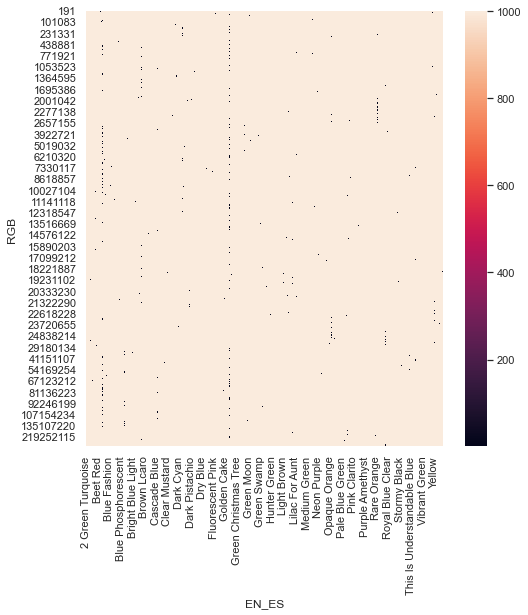

In [13]:
import numpy as np; np.random.seed(1)
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(8,8))
uniform_data = np.random.rand(20, 10)
ax = sns.heatmap(df2.T)

#### We can see that most of the values are close

In [14]:
df1.groupby("EN_ES").EN_DE.value_counts()

EN_ES                EN_DE            
2 Green Turquoise    Green                1
Alexandra Blue       Bright Turquoise     1
Almost Black Purple  Brown                1
Amber                Vanilla Yellow       1
                     Yellow               1
                                         ..
Yellowish Green      Olive                2
                     Dark Yellow          1
                     Light Olive Green    1
                     Sunny Yellow         1
                     Yellow               1
Name: EN_DE, Length: 1750, dtype: int64

In [15]:
df7=df1.groupby("EN_ES").EN_KO.value_counts()

<AxesSubplot:ylabel='EN_ES-EN_KO'>

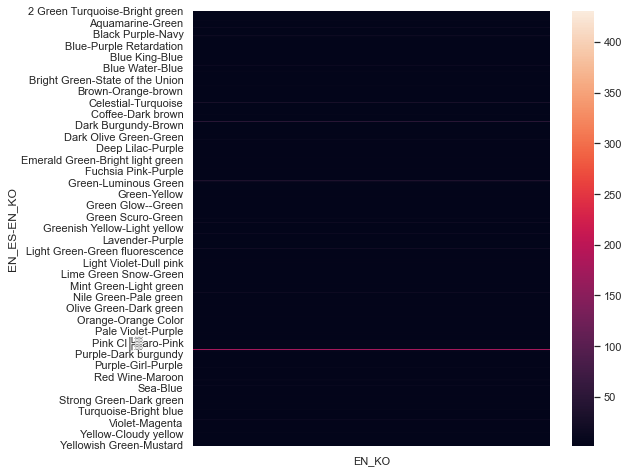

In [16]:
#sns.heatmap(df7)
plt.figure(figsize=(8,8))
sns.heatmap(df7.to_frame())


### We can see that the value between 250 to 300 has varied values

In [17]:
df5=(df4
 .groupby("Name")
 .red
 .value_counts()
 .unstack()
 .fillna(1000)
)

In [18]:
array = ['yellow', 'green']
h=df1.loc[df1['EN_ES'].isin(array)]

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df2, robust=True, fmt="f", cmap='RdBu_r', vmin=0, vmax=5)


<AxesSubplot:xlabel='RGB', ylabel='EN_ES'>

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df2)

<AxesSubplot:xlabel='RGB', ylabel='EN_ES'>

<AxesSubplot:xlabel='red', ylabel='Name'>

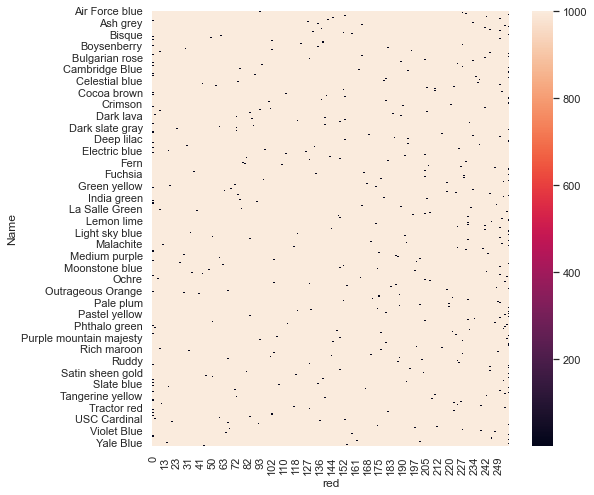

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df5)

### Green
In Indonesia, the green color is associated with exorcism and disloyalty while it symbolizes growth and longevity in Western countries. Green is associated with unfaithfulness in China. On the contrary, color green symbolizes patriotism and independence in Mexico, where it is the country’s national color. In South America, green is linked to death. It is predominantly used as a color of Islam in several country flags.


In [22]:
import altair as alt
from vega_datasets import data

colors = ['#252c56', '#e6402f','#f3d695']


bar = alt.Chart(df1).mark_bar(size=20).encode(
    x='EN_ES:O',
    y='b:Q',
    color=alt.Color('EN_ES', scale=alt.Scale(range=colors)),
    column='Level:N'
)

bar

alt.Chart(...)

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap (df4.corr(),
             cmap='Greens',
             square=True
             );

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap (df1.corr(),
             cmap='Greens',
             square=True
             );

### Blue
Blue is a prominent color in Western nations, where it symbolizes trust, safety, and reliability. Banks employ it frequently, and police wear it as a result. Due to its lack of negative associations, the color blue is one of the most popular in American marketing. In Asian cultures, blue is connected with spirituality, immortality, and heaven. In Hinduism, blue is connected with Krishna, the deity of divine pleasure and love. The Virgin Mary's blue cloak symbolizes the color’s association with Catholicism in Latin America. Mourning is also a consequence of blue.


In [25]:
alt.Chart(df1).mark_bar().encode(
    x = "EN_ES:O",
    y = "RGB:Q"
)

alt.Chart(...)

In [26]:
import altair as alt  
import pandas as pd   
alt.Chart(df1).mark_bar().encode(
    x = "EN_ES:O",
    y = "b:Q"
)


alt.Chart(...)

In [27]:
alt.Chart(df1).mark_point().encode(
    x='EN_ZH',
    y='cx',
    color='EN_ZH',
    
)

alt.Chart(...)

In [28]:
import altair as alt
from vega_datasets import data

source = df1

alt.Chart(source).mark_circle().encode(
    alt.X('RGB:Q', bin=True),
    alt.Y('b:Q', bin=True),
    size='count()'
)

alt.Chart(...)

In [29]:
import altair as alt
from vega_datasets import data
plt.figure(figsize=(8,8))


source = df4

alt.Chart(source).mark_circle().encode(
    alt.X('red', scale=alt.Scale(zero=False)),
    alt.Y('HSLS', scale=alt.Scale(zero=False, padding=1)),
    color='Name',
   
)

alt.Chart(...)

<Figure size 576x576 with 0 Axes>

In [30]:
source = df4

alt.Chart(source).mark_line(point=True).encode(
    alt.X('red', scale=alt.Scale(zero=False)),
    alt.Y('HSLS', scale=alt.Scale(zero=False)),
    order='HSL'
)

alt.Chart(...)

### We can see above that the values differ markedly concerning the r column from the RGB column, which means that more colors are included in red than in RGB.

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(df4.corr(),annot=True)


<AxesSubplot:>

### This heat map's colors are reflecting 
###  the correlation between the data's varaibles 

### In this visualization we can see the relationship between color and RGB

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.
Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly. Here is an example of using the Altair API to quickly visualize a dataset with an interactive scatter plot:

In [32]:
#anther way for same visualize 
alt.Chart(df1).mark_point().encode(
    x='EN_DE',
    y='cy',
    color='EN_DE',
    
)

alt.Chart(...)

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
plt.figure(figsize=(8,8))
heat_map = sns.heatmap( df4.corr(), linewidth = 6 , annot = True)
plt.title( "df1" )
plt.show()

### Most people like light colors

In [34]:
#example to display anther heatmap
import numpy as np; np.random.seed(0)

import seaborn as sns; sns.set_theme()
plt.figure(figsize=(8,8))

df1 = np.random.rand(10, 12)
ax = sns.heatmap(df1)

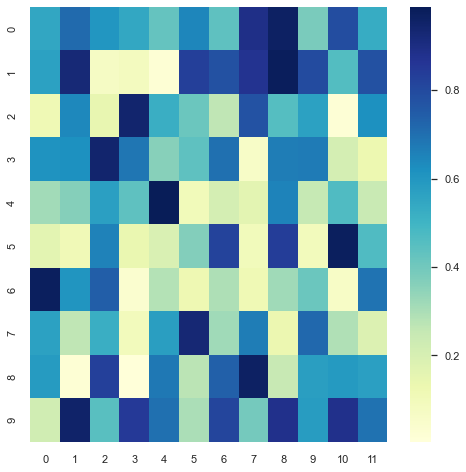

In [35]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(df1, cmap="YlGnBu")



In [36]:
#d=df4.to_frame()
plt.figure(figsize=(10,8))

ax = sns.heatmap(df2, cmap="YlGnBu")



<a id='eda1'></a>

### Conclusion

A child’s learning experience is central to realism’s notion that the naming of color and categorizing are direct results of seeing boundaries and colors. However, there is considerable cultural learning, as well as biological learning, involved in learning color names. The connection between specific wavelengths and biological sensations is known as an internal color representation. This connection may not be isomorphic. It is either interpreted or mediated by the human brain. Thus, the Universalist position (that all cultures associate the names of color with its perceptual structure) is only partially correct.

<a id='eda2'></a>

### Sources

https://altair-viz.github.io/gallery/simple_histogram.html

https://eriksen.com/marketing/color_culture/

https://altair-viz.github.io/getting_started/overview.html

https://altair-viz.github.io/user_guide/display_frontends.html

https://www.statology.org/pandas-rename-columns/

https://psychology.wfu.edu/wp-content/uploads/Schirillo2001.pdf

https://www.researchgate.net/publication/282125056_Cross-cultural_variation_of_color_preferences